___
# MINIPROJETO 1

___
## <font color='red'>HENRIQUE MELLO GUAZZELLI</font>
___

## <font color='blue'>Média de jardas obtidas por recepção para cada time da NFL</font>

___
### Itens 1 a 3 - Resolução:

In [99]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Henrique\Documents\semestre2-insper\CIENCIA DOS DADOS


In [100]:
a = pd.read_csv('nfl06.csv')

In [101]:
nfl = pd.DataFrame()

In [102]:
nfl['jardas por recepção'] = a.YPR
nfl.head()

,jardas por recepção
0,4.9
1,3.8
2,4.0
3,4.1
4,3.7


In [103]:
jardas = []
for jarda in nfl['jardas por recepção']:
    jardas.append(jarda)

jardas.sort()

In [104]:
nfl.describe()

,jardas por recepção
count,32.000000
mean,4.134375
std,0.527691
min,3.200000
25%,3.775000
50%,4.000000
75%,4.425000
max,5.500000


In [105]:
delta = (nfl['jardas por recepção'].max() - nfl['jardas por recepção'].min())/np.sqrt(32)
print(delta)

0.406586399182


In [106]:
delta = 0.4

In [107]:
faixa = np.arange(3,6,delta)
faixa_jarda = pd.cut(nfl['jardas por recepção'], faixa)
faixa_jarda.value_counts()

(3.8, 4.2]    9
(3.4, 3.8]    8
(4.6, 5]      6
(4.2, 4.6]    6
(3, 3.4]      2
(5.4, 5.8]    1
(5, 5.4]      0
dtype: int64

In [108]:
jardas = pd.Series(data=sorted(nfl['jardas por recepção']))

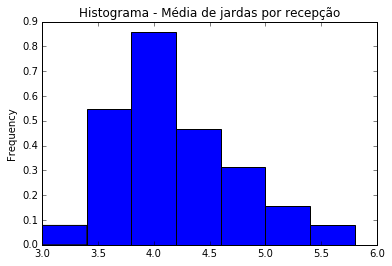

In [109]:
plot = jardas.plot.hist(bins=faixa,title='Histograma - Média de jardas por recepção',normed=True)

___
### Itens 4 a 6 - Resolução:

### Item 4

O histograma segue o comportamento de uma assimetria positiva.

#### Distribuições teóricas

**1)** O histograma acima se parece muito com um gráfico da função 
*Gamma*.


**2)** Outro gráfico que é semelhante ao histograma acima é o da função *inverse Gaussian*.

### Item 5

In [138]:
#Para lognormamma
sigma = 0.5
mi = 0


#Para inversa gaussiana
_lambda = 0.5
mi = 1

### Item 6

In [139]:
#Para lognorm
param_lognorm = stats.lognorm.fit(jardas)

loc_lognorm = param_lognorm[1]
scale_lognorm = param_lognorm[2]

#para inversa gaussiana
param_gauss = stats.invgauss.fit(jardas)
mu_gauss = param_gauss[0]
loc_gauss = param_gauss[1]
scale_gauss = param_gauss[2]

In [122]:
print(stats.lognorm.fit(jardas))
print(stats.invgauss.fit(jardas))

(0.27980935994192502, 2.2960831198169878, 1.7679511535460928)
(0.078058077431366307, 2.2622788433962908, 23.983374429371722)


___
### Itens 7 a 9 - Resolução:

### Item 7

Utilizarei os valores obtidos no item 6

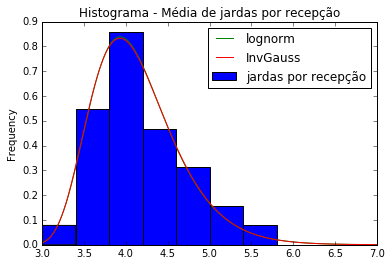

In [136]:
x = np.linspace(3, 7, 10000)

nfl['jardas por recepção'].plot.hist(bins=faixa,title='Histograma - Média de jardas por recepção',normed=True)
lognorm = stats.lognorm.pdf(x, param_lognorm[0], loc=loc_lognorm, scale=scale_lognorm)
gauss = stats.invgauss.pdf(x, scale=scale_gauss, loc=loc_gauss, mu=mu_gauss)


plt.plot(x, lognorm, '-', color='green', label="lognorm") # Plota a lognorm teórica
plt.plot(x, gauss, '-', color='red', label="InvGauss") # Plota a invgauss teórica

plt.legend()

### Item 8

## Q-Qplot
O Q-Q-Plot permite comparar o valor dos quantis encontrados nos dados com o que seria o quantil teórico de uma distribuição estudada

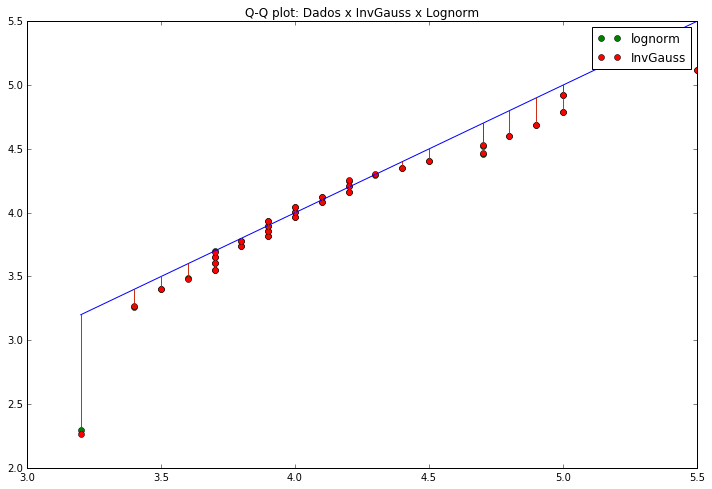

In [140]:
fra = [] # frequencia relativa acumulada
for i in range(len(jardas)):
    acc = (i - 0.5) / len(jardas)
    if acc < 0:
        acc = 0
    fra.append(acc)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_lognorm = stats.lognorm.ppf(fra, param_lognorm[0], loc=loc_lognorm, scale=scale_lognorm)
q_gauss = stats.invgauss.ppf(fra, mu=mu_gauss,scale=scale_gauss,loc=loc_gauss)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x InvGauss x Lognorm")

lognorm_plot, = plt.plot(jardas, q_lognorm, 'o', color="green", label = "lognorm")
gauss_plot, = plt.plot(jardas, q_gauss, 'o', color="red", label = "InvGauss")

plt.legend(handles=[lognorm_plot,gauss_plot])
plt.plot((min(jardas), max(jardas)), (min(jardas), max(jardas)), '-')


for i in range(len(nfl['jardas por recepção'])):
    plt.plot((jardas[i], jardas[i]), (q_lognorm[i], jardas[i]), '-', color='green', alpha=0.7  )
    plt.plot((jardas[i], jardas[i]), (q_gauss[i], jardas[i]), '-', color='red', alpha=0.7  )

### Testes de aderência que usam a diferença entre quantis

### Erros quadráticos e erros quadráticos médios

In [133]:
#Erro quadrático:
erro_quadratico_lognorm = sum((jardas - q_lognorm)**2)
erro_quadratico_gauss = sum((jardas - q_gauss)**2)

print("Erro quadrático da lognorm: {:4.3f}".format(erro_quadratico_lognorm))
print("Erro quadrático da invgauss: {:4.3f}\n".format(erro_quadratico_gauss))

#Erro quadrático médio:
eqm_lognorm = erro_quadratico_lognorm/len(jardas)
eqm_gauss = erro_quadratico_gauss/len(jardas)

print("Erro quadratico médio da lognorm:", eqm_lognorm)
print("Erro quadratico médio da invgauss:", eqm_gauss)

Erro quadrático da lognorm: 1.291
Erro quadrático da invgauss: 1.350

Erro quadratico médio da lognorm: 0.0403555573624
Erro quadratico médio da invgauss: 0.0421810585754


Observando os erros quadráticos, observamos que os erros da lognorm são menores e portanto aparentam ser mais adequados

In [150]:
soma_diferenças_lognorm = sum(abs(jardas - q_lognorm))
soma_diferenças_gauss = sum(abs(jardas - q_gauss))

print("Soma de diferenças da lognorm :", soma_diferenças_lognorm)
print("Soma de diferenças da invgauss :", soma_diferenças_gauss)

Soma de diferenças da lognorm : 3.64672721889
Soma de diferenças da invgauss : 3.67662429578


Com a soma das diferenças confirmamos a maior aderência da curva da lognorm.

### Item 9

### Testes de aderência que usam a cumulativa

As linhas verticais tracejadas ligam a diferença entre a função cumulativa de probabilidade teórica e aquela observada nos dados

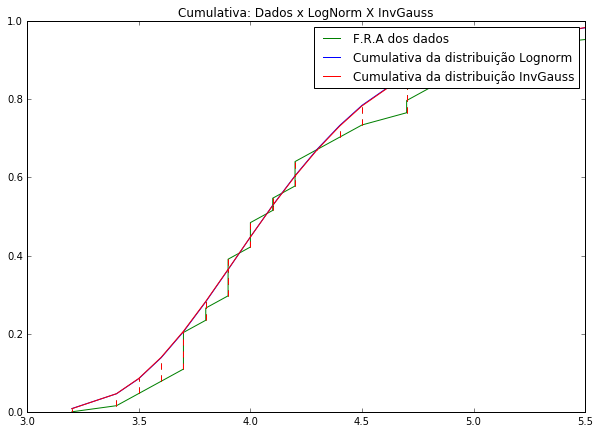

In [148]:
# fra e FDA
cdf_lognorm = stats.lognorm.cdf(jardas, param_lognorm[0], loc=loc_lognorm, scale=scale_lognorm)
cdf_gauss = stats.invgauss.cdf(jardas, scale=scale_gauss, loc=loc_gauss, mu=mu_gauss)


fig = plt.figure(figsize=(10,7))

plt.title("Cumulativa: Dados x LogNorm X InvGauss")

dados_fra_plot, = plt.plot(jardas, fra, '-', color='green', label="F.R.A dos dados")
cdf_lognorm_plot, = plt.plot(jardas, cdf_lognorm, '-', color='blue', label = "Cumulativa da distribuição Lognorm")
cdf_gauss_plot, = plt.plot(jardas, cdf_gauss, '-', color='red', label = "Cumulativa da distribuição InvGauss")

plt.legend(handles=[dados_fra_plot, cdf_lognorm_plot, cdf_gauss_plot])


for i in range(len(nfl['jardas por recepção'])):   
    plt.plot((jardas[i], jardas[i]), (fra[i], cdf_lognorm[i]), '--', color="green", alpha=1)
    plt.plot((jardas[i], jardas[i]), (fra[i], cdf_gauss[i]), '--', color="red", alpha=1)
    

___
### Itens 10 e 11 - Resolução:

### Item 10

### Erros quadráticos nas CDFs

In [135]:
# Erro quadrático nas CDFs
erro_quad_cdf_lognorm = sum((fra - cdf_lognorm)**2)

erro_quad_cdf_gauss = sum((fra - cdf_gauss)**2)

print("Erro quadrático da CDF da Lognorm versus F.R.A", erro_quad_cdf_lognorm)
print("Erro quadrático da CDF da InvGauss versus F.R.A", erro_quad_cdf_gauss)

Erro quadrático da CDF da Lognorm versus F.R.A 0.062229743371
Erro quadrático da CDF da InvGauss versus F.R.A 0.0625932142027


Comparando os erros quadráticos das CDFs com a F.R.A confirmamos mais uma vez que o modelo lognorm é mais adequado para essa análise

## Conclusão
Com todas as análises feitas é possível concluir que o modelo lognorm é mais adequado que o modelo inversa gaussiana para satisfazer o histograma das médias de jardas por recepção dos times da NFL em 2006.